
# MACD Implementation



## Celem projektu jest zaipmlementowanie wskaźnika giełdowego MACD
## i opracowanie algorytmu , który na podstawie MACD będzie
## podejmował za nas decyzje o sprzedaży i zakupie

### Importing libraries 


In [4]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import mpld3
mpld3.enable_notebook()

### Parsowanie danych wejściowych z pliku (txt/csv)


In [5]:
data = pd.read_csv('TSLA.csv')
#data = pd.read_csv('MSFT.csv')
start_date = '2016-01-01'
end_date = '2021-01-01'
prices_with_date =  data.loc[(data['Date'] > start_date) & (data['Date'] < end_date)]
prices_with_date

,Date,Open,High,Low,Close,Adj Close,Volume
1245,2016-01-04,46.144001,46.276001,43.799999,44.681999,44.681999,34135500
1246,2016-01-05,45.271999,45.377998,44.000000,44.686001,44.686001,15934000
1247,2016-01-06,44.000000,44.009998,43.195999,43.807999,43.807999,18895500
1248,2016-01-07,42.838001,43.688000,42.734001,43.130001,43.130001,17771500
1249,2016-01-08,43.571999,44.088001,42.153999,42.200001,42.200001,18140500
...,...,...,...,...,...,...,...
2499,2020-12-24,642.989990,666.090027,641.000000,661.770020,661.770020,22865600
2500,2020-12-28,674.510010,681.400024,660.799988,663.690002,663.690002,32278600
2501,2020-12-29,661.000000,669.900024,655.000000,665.989990,665.989990,22910800
2502,2020-12-30,672.000000,696.599976,668.359985,694.780029,694.780029,42846000


### Wizualizacja danych wejściowych




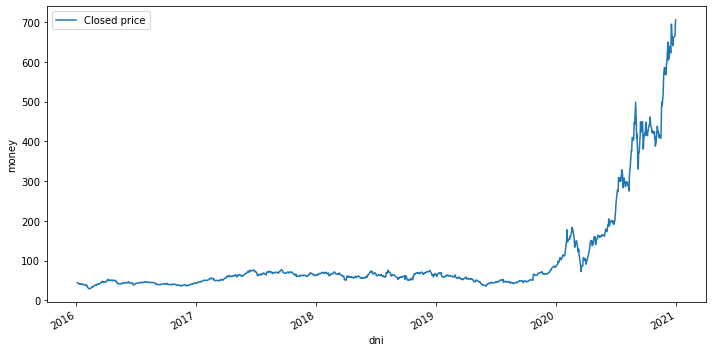

In [6]:



price_array = prices_with_date['Close']
date_array = pd.to_datetime(prices_with_date['Date'])
plt.figure(figsize=(10, 5))
plt.xlabel("dni")
plt.ylabel("money")
plt.plot( date_array, price_array,label = "Closed price")
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.legend()
plt.show()


### EMA formula
#### Function that compute Exponential Moving Average
#### where n is period
#### prices is an array of price with length n;

In [8]:

def EMA(prices,n):
    a = 2/(n+1)
    wagi = (1-a)**np.arange(n,-1,-1)
    return (wagi*prices).sum()/wagi.sum()

### Calculating EMA1 with period 12 and EMA2 with period 26
#### And EMA1 - EMA2
####  Calculating Exponensial moving average starting with 26 day because it's impossible to calculate EMA_2(26) before this day

In [9]:

price_array
period_1 = 12
period_2 = 26
EMA1 = []
EMA2 = []
MACD = []
for i in range(period_2,price_array.size):
    ema_elem1 = EMA(price_array[i-period_1:i], period_1-1)
    EMA1.append(ema_elem1)
    ema_elem2 = EMA(price_array[i-period_2:i],period_2-1)
    EMA2.append(ema_elem2)
    MACD.append(ema_elem1 - ema_elem2)
    


#### start drawing plot starting 26 day.


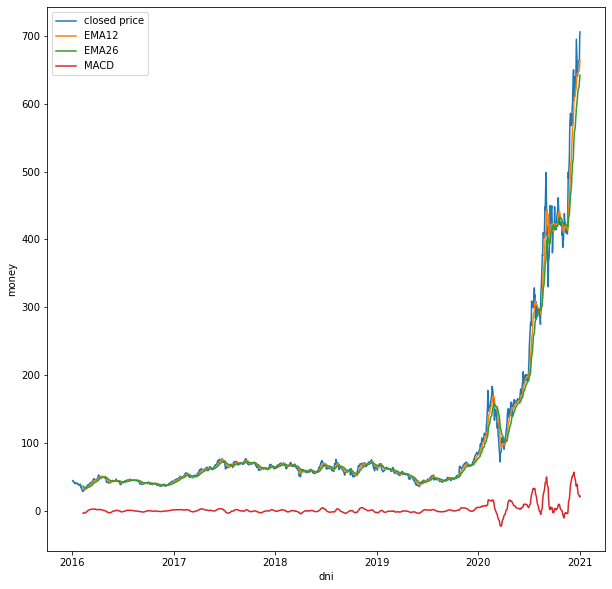

In [10]:

plt.figure(figsize=(10, 10))
plt.xlabel("dni")
plt.ylabel("money")
plt.plot(date_array,price_array, label = "closed price")
plt.plot(date_array[period_2:],EMA1, label= "EMA12")
plt.plot(date_array[period_2:],EMA2, label= "EMA26")
plt.plot(date_array[period_2:],MACD, label= "MACD")
plt.legend()


### Implementacja wskaźnika MACD

#### Linii Sygnal i MACD
#### invest dates starting with period 2 + period 3 = 26 + 9 = 35 day
#### invest points shows where exactly crossing of two lines happend
#### invest dicision True - sell , False - buy


In [11]:

period_3 = 9
Sygnal = []
for i in range(period_3,len(MACD)):
    Sygnal.append(EMA(MACD[i-period_3:i],period_3-1))


MACD_is_higher = MACD[0] > Sygnal[0]
invest_dates = []
invest_price = []
invest_decision = []
change_cnt = 0



### Ploting


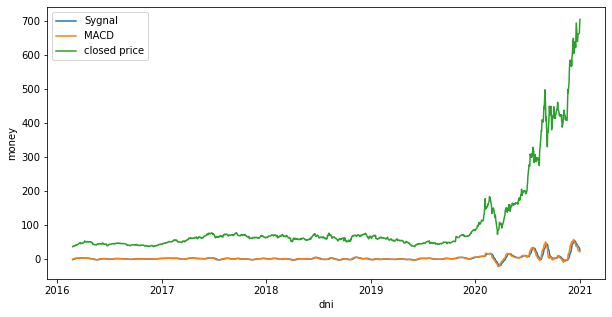

In [12]:
plt.figure(figsize=(10, 5))
plt.xlabel("dni")
plt.ylabel("money")
plt.plot(date_array[period_2+period_3:], Sygnal,label="Sygnal")
plt.plot(date_array[period_2+period_3:], MACD[period_3:],label="MACD")
plt.plot(date_array[period_2+period_3:],price_array[period_2+period_3:],label = "closed price")
difference = np.array(MACD[period_3:]) - np.array(Sygnal)
plt.legend()



In [13]:
# True - buy 
MACD_bigger = difference[0] > 0 
invest = []
for i in range(0,len(difference)):
    is_change = False
    if difference[i] > 0 and MACD_bigger == False: 
        MACD_bigger = True
        invest.append((True, np.array(price_array)[period_2+period_3+i]))
    elif difference[i] < 0 and MACD_bigger == True:
        MACD_bigger = False    
        invest.append((False, np.array(price_array)[period_2+period_3+i]))


## Analiza i omówienie wyników, wniosków




## Analiza automatycznego zarabiania przez algorytm

In [14]:
gotowka = 0
stock = 1000
price_begin = np.array(price_array)[period_2+period_3]
print("price_begin:" + str(price_begin))
print("Stock begin:" + str(stock))
print("Gotowka:" + str(gotowka))
money_begin = stock * price_begin + gotowka

for decision, price in invest:
    if decision: # BUY    
        amount =  math.floor(gotowka/price)
        stock += amount 
        gotowka -= price * amount
    else:# SELL
        amount = stock
        gotowka += amount * price
        stock -= amount
price_end = np.array(price_array)[-1]
money_end = stock * price_end + gotowka
print("price_end:" + str(price_end))
print("Stock end:" + str(stock))
print("Gotowka:" + str(gotowka))
print("Money end/ Money Begin " + str(money_end/ money_begin))
print("Algorytm Save and Keep " + str(price_end/price_begin))

price_begin:35.799999
Stock begin:1000
Gotowka:0
price_end:705.669983
Stock end:0
Gotowka:277770.50837699993
Money end/ Money Begin 7.758952964691423
Algorytm Save and Keep 19.71145258970538


#### Algorytm sprzedawania wszystkich akcji (dla Microsoft i Tesla)daje wynik gorszy niż zachowanie tych akcji.
#### Z tego wynika ze wykorzystanie MACD nie jest skuteczne(przynajmniej dla tych kompanij i algorytmu w którym sprzedajemy wszytko i kupujemy ile się da).

In [30]:
gotowka = 0
stock = 1000
price_begin = np.array(price_array)[period_2+period_3]
print("price_begin:" + str(price_begin))
print("Stock begin:" + str(stock))
print("Gotowka:" + str(gotowka))
money_begin = stock * price_begin + gotowka
amount = 100
for decision, price in invest:
    if decision: # BUY    
        stock += amount 
        gotowka -= price * amount
    else:# SELL
        gotowka += amount * price
        stock -= amount
price_end = np.array(price_array)[-1]
money_end = stock * price_end + gotowka
print("price_end:" + str(price_end))
print("Stock end:" + str(stock))
print("Gotowka:" + str(gotowka))
print("Money end/ Money Begin " + str(money_end/ money_begin))
print("Algorytm Save and Keep " + str(price_end/price_begin))

price_begin:35.799999
Stock begin:1000
Gotowka:0
price_end:705.669983
Stock end:900
Gotowka:45929.9952
Money end/ Money Begin 19.023268126348274
Algorytm Save and Keep 19.71145258970538


### Wyniki lepsze gdy sprzedajemy część akcji 
#### Im bliżej liczba sprzedanych/ kupowanych do 0 tym bardziej strategia podobna do przechowywania akcji.

# Podsumowanie:
### Myśle że nie odkryłem pełnego potencjalu MACD. Mój algorytm pozwala zarobić, ale mniej niż to możliwe.